In [1]:
import  numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [99]:
# GDP FUNCTION (RETURN GDP )

def rgdp(p='per capita'):
    add = 0
    if p == 'gdp':
        key = 'Annual GDP.1'
        add = 0 
    else:
        key = 'GDP per capita.1'
        add = 1
    reference = ['Date', 'Annual GDP', 'Annual GDP.1', 'GDP Growth (%)']
    index= 0
    index2= 0
    
    for ind, k in enumerate(site):
     
        if  reference == list(site[ind].columns):
            index = ind
            break
    for ind, k in enumerate(site2):
       
        if reference == list(site[ind].columns):
            
            index2 = ind
           
            break
        
#     
    c1 = site[index+add][site[index+add]['Date'] > year][key].iloc[::-1]

    c2 = site2[index2+add][site2[index2+add]['Date'] > year][key].iloc[::-1]
    c1 = c1.str.replace('M', '', regex=False).str.replace('$', '').str.replace(',', '').str.replace('€', '').astype(str).astype(int)
    
    c2 = c2.str.replace('M', '', regex=False).str.replace('$', '').str.replace(',', '').str.replace('€', '').astype(str).astype(int)

    
    c1 = c1 /1000
    c2 = c2 / 1000
    
    return [c1,c2]

What do you want to compare? (capita, gdp, hdi): hdi
Country 1 (red): usa
Country 2 (black): south korea


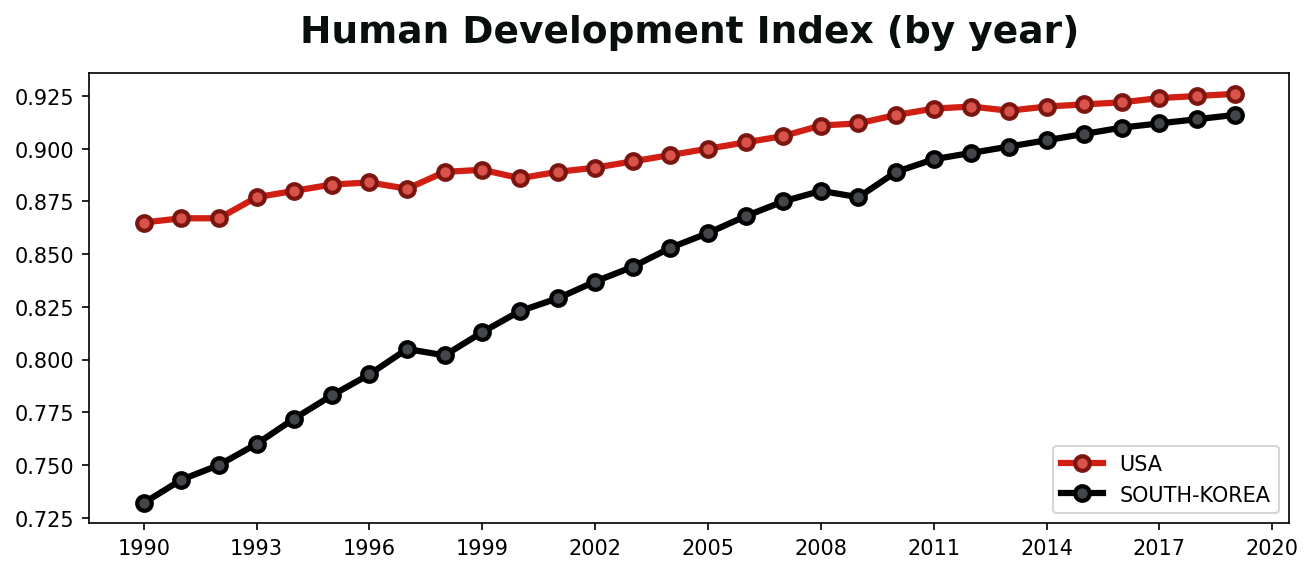

In [9]:
# ASKING INFO

dic = {'gdp': 'Gross Domestic Product', 'hdi': 'Human Development Index', 'capita': 'GDP Per Capita'}
year = 1990
maxyear = 2020

a = input('What do you want to compare? (capita, gdp, hdi): ').lower().strip()
country1 = input('Country 1 (red): ').lower().strip().replace(' ', '-')
country2 = input('Country 2 (black): ').lower().strip().replace(' ', '-')


site = pd.read_html(f'https://countryeconomy.com/{"gdp" if a == "capita" else a}/{country1}')
site2 = pd.read_html(f'https://countryeconomy.com/{"gdp" if a == "capita" else a}/{country2}')


# SETTING DATA
if a == 'hdi':
    c1 = site[0][site[0]['Date'] >= year]['HDI'].iloc[::-1]
    c2 = site2[0][site2[0]['Date'] >= year]['HDI'].iloc[::-1]
    
elif a== 'gdp':
    c1,c2 = rgdp('gdp')

    
else:
    c1,c2 = rgdp()
years = np.arange(year,maxyear)

if len(years) > len(c1):
    lista = list(c1)
    nanList = np.empty(len(years) - len(c1))
    nanList[:] = np.nan

    c1 = list(nanList) + lista
    
    
    
if len(years) > len(c2):
    lista = list(c2)
    nanList = np.empty(len(years) - len(c2))
    nanList[:] = np.nan
    c2= list(nanList) + lista
    

figure = plt.figure(figsize=(8,3), dpi=150)

axes = figure.add_axes([0, 0,1,1])
axes.set_title(f'{dic[a]} (by year)',  pad=15, fontsize=18, color='#090F0F', fontweight=900)

axes1 = axes.plot(years,c1, label=country1.upper(), color='#d11f13',  lw=3, ls='-', marker='o',markersize=7,
                     markerfacecolor='#d9534a',
                     markeredgecolor='#7a150f',
                    markeredgewidth=2)
axes2 = axes.plot(years,c2, label=country2.upper(),color='#000', lw=3, marker='o', markersize=7, 
                   markerfacecolor='#43464a',
                     markeredgecolor='#000',
                    markeredgewidth=2)
t = np.linspace(year,maxyear,11)
plt.xticks(t)

axes.legend(loc='lower right');

figure.savefig('vizualization.png', bbox_inches='tight')

'sss-ss-ss'